In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
import scipy.io
import scipy 
import bct

In [92]:
def normalized(val, mean):
    return val/mean

In [27]:
# function that takes in a participant's correlation matrix and 
# returns 5 matrices at different thresholds
def threshold(arr, thresholds):
    #thresholding the array
    return [bct.threshold_proportional(arr, p, copy=True) for p in thresholds]

In [29]:
def get_clustering_coeff(arr):
    return bct.clustering_coef_wu(arr)

In [98]:
def charpath(array):
    
    # converting to lengths
    array = bct.weight_conversion(array, 'lengths')
    
    # turning into distance array 
    distance_array, other_arr = bct.distance_wei(array)
    
    return bct.charpath(distance_array)[1]

In [30]:
# generate NUM_RANDOMS randomize undirected, weighted networks (working)
def randomize(array, iterations, num_randoms):
    randomizedArrays = []
    for i in range(num_randoms):
        random_arr, eff = bct.randmio_und(array, iterations)
        randomizedArrays.append(random_arr)
    return randomizedArrays

In [31]:
# generate NUM_RANDOMS randomized directed, weighted networks (resting)
def randomize_d(arr, iterations, num_randoms):
    randomizedArrays = []
    for i in range(num_randoms):
        rarr, eff = bct.randmio_dir(arr, iterations)
        randomizedArrays.append(rarr)
    return randomizedArrays

In [17]:
working = np.array(pd.read_csv('subj001cond002.csv'))

resting = np.array(pd.read_csv('subj001cond001.csv'))

### Thresholding Networks 

In [28]:
thresholds = [.1, .2, .3, .4, .5]

restingStates = threshold(resting, thresholds)
workingStates = threshold(working, thresholds)

## Randomizing Networks 

Here we are randomizing networks for each threshold

In [33]:
randomizedWorkingNetworks = [randomize(i, 5, 100) for i in workingStates]

In [34]:
randomizedRestingNetworks = [randomize_d(i, 5, 100) for i in restingStates]

#### Getting Network Metrics for Randomized Networks 

In [42]:
# CLUSTERING COEFFICIENTS WORKING STATE NETWORKS

random_clust_coeffs = {}

count = 10
for i in randomizedWorkingNetworks:
    #obtaining clustering coefficients for each of the randomized matrices
    randomizedClusters = [get_clustering_coeff(arr) for arr in i]
    
    randomizedAvgClusters = [np.mean(arr) for arr in randomizedClusters]
    
    randomizedAvg = np.mean(randomizedAvgClusters)
    
    random_clust_coeffs[count] = randomizedAvg
    
    count += 10

In [43]:
random_clust_coeffs

{10: 0.04553406294369868,
 20: 0.05690102282478066,
 30: 0.06127793657709912,
 40: 0.061323656268193194,
 50: 0.05716521136735544}

In [44]:
# CLUSTERING COEFFICIENTS RESTING STATE NETWORKS

random_clust_coeffs_resting = {}

count = 10
for i in randomizedRestingNetworks:
    #obtaining clustering coefficients for each of the randomized matrices
    randomizedClusters = [get_clustering_coeff(arr) for arr in i]
    
    randomizedAvgClusters = [np.mean(arr) for arr in randomizedClusters]
    
    randomizedAvg = np.mean(randomizedAvgClusters)
    
    random_clust_coeffs_resting[count] = randomizedAvg
    
    count += 10

In [45]:
random_clust_coeffs_resting

{10: 0.06446721422003235,
 20: 0.07079388158927634,
 30: 0.07710257209169963,
 40: 0.07941956699815134,
 50: 0.07575776418353161}

In [ ]:
random_efficiencies = {}

count = 10

for random_networks in randomizedWorkingNetworks:
    random_working_global_eff = []
    for arr in random_networks:
        # adding the global efficiency for the current random network
        random_working_global_eff.append(charpath(arr))
        
    randomized_avg_efficiency = np.mean(random_working_global_eff)
    random_efficiencies[count] =  randomized_avg_efficiency
    count += 10

In [57]:
random_efficiencies = {}

In [55]:
random_working_global_eff = []
for arr in randomizedWorkingNetworks[0]:
    random_working_global_eff+= [charpath(arr)]

In [58]:
randomized_avg_efficiency = np.mean(random_working_global_eff)
random_efficiencies[10] = randomized_avg_efficiency

In [59]:
random_working_global_eff = []
for arr in randomizedWorkingNetworks[1]:
    random_working_global_eff += [charpath(arr)]

In [60]:
randomized_avg_efficiency = np.mean(random_working_global_eff)
random_efficiencies[20] = randomized_avg_efficiency

In [62]:
random_working_global_eff = []
for arr in randomizedWorkingNetworks[2]:
    random_working_global_eff += [charpath(arr)]

In [63]:
randomized_avg_efficiency = np.mean(random_working_global_eff)
random_efficiencies[30] = randomized_avg_efficiency

In [65]:
random_working_global_eff = []
for arr in randomizedWorkingNetworks[3]:
    random_working_global_eff += [charpath(arr)]

In [66]:
randomized_avg_efficiency = np.mean(random_working_global_eff)
random_efficiencies[40] = randomized_avg_efficiency

In [67]:
random_working_global_eff = []
for arr in randomizedWorkingNetworks[4]:
    random_working_global_eff += [charpath(arr)]

In [68]:
randomized_avg_efficiency = np.mean(random_working_global_eff)
random_efficiencies[50] = randomized_avg_efficiency

In [69]:
random_efficiencies

{10: 0.18636043296382718,
 20: 0.1899269043027701,
 30: 0.19062799662645585,
 40: 0.19080078731427177,
 50: 0.19088647399171}

In [70]:
random_resting_efficiencies = {}

In [71]:
random_resting_global_eff = []
for arr in randomizedRestingNetworks[0]:
    random_resting_global_eff += [charpath(arr)]

In [72]:
randomized_resting_avg_efficiency = np.mean(random_resting_global_eff)
random_resting_efficiencies[10] = randomized_resting_avg_efficiency

In [74]:
random_resting_global_eff = []
for arr in randomizedRestingNetworks[1]:
    random_resting_global_eff += [charpath(arr)]

In [75]:
randomized_resting_avg_efficiency = np.mean(random_resting_global_eff)
random_resting_efficiencies[20] = randomized_resting_avg_efficiency

In [77]:
random_resting_global_eff = []
for arr in randomizedRestingNetworks[2]:
    random_resting_global_eff += [charpath(arr)]

In [78]:
randomized_resting_avg_efficiency = np.mean(random_resting_global_eff)
random_resting_efficiencies[30] = randomized_resting_avg_efficiency

In [80]:
random_resting_global_eff = []
for arr in randomizedRestingNetworks[3]:
    random_resting_global_eff += [charpath(arr)]

In [81]:
randomized_resting_avg_efficiency = np.mean(random_resting_global_eff)
random_resting_efficiencies[40] = randomized_resting_avg_efficiency

In [83]:
random_resting_global_eff = []
for arr in randomizedRestingNetworks[4]:
    random_resting_global_eff += [charpath(arr)]

In [84]:
randomized_resting_avg_efficiency = np.mean(random_resting_global_eff)
random_resting_efficiencies[50] = randomized_resting_avg_efficiency

In [85]:
random_resting_efficiencies

{10: 0.21708962046900715,
 20: 0.21942865066322428,
 30: 0.22013114109943568,
 40: 0.2199797903015698,
 50: 0.21998728136112966}

# Clustering Coefficient

In [87]:
restingClusters = [get_clustering_coeff(i) for i in restingStates]
workingClusters = [get_clustering_coeff(i) for i in workingStates]

In [89]:
restingAvgClusters = [np.mean(i) for i in restingClusters]
workingAvgClusters = [np.mean(i) for i in workingClusters]

In [93]:
standardizedWorkingClusters = []

#standardizing working state cluster coefficients
count = 10
for i in workingAvgClusters:
    standardizedWorkingClusters.append(normalized(i, random_clust_coeffs[count]))
    count += 10

In [94]:
standardizedRestingClusters = []

#standardizing resting state cluster coefficients
count = 10
for i in restingAvgClusters:
    standardizedRestingClusters.append(normalized(i, random_clust_coeffs_resting[count]))
    count += 10

In [106]:
random_clust_coeffs_resting

{10: 0.06446721422003235,
 20: 0.07079388158927634,
 30: 0.07710257209169963,
 40: 0.07941956699815134,
 50: 0.07575776418353161}

In [105]:
restingAvgClusters

[0.15209105973393913,
 0.1348173211789563,
 0.12329177084372243,
 0.11189634741883275,
 0.09850244967392581]

In [104]:
standardizedRestingClusters

[2.3592001232570525,
 1.9043640234494228,
 1.599061710899723,
 1.4089266870648813,
 1.3002291017365912]

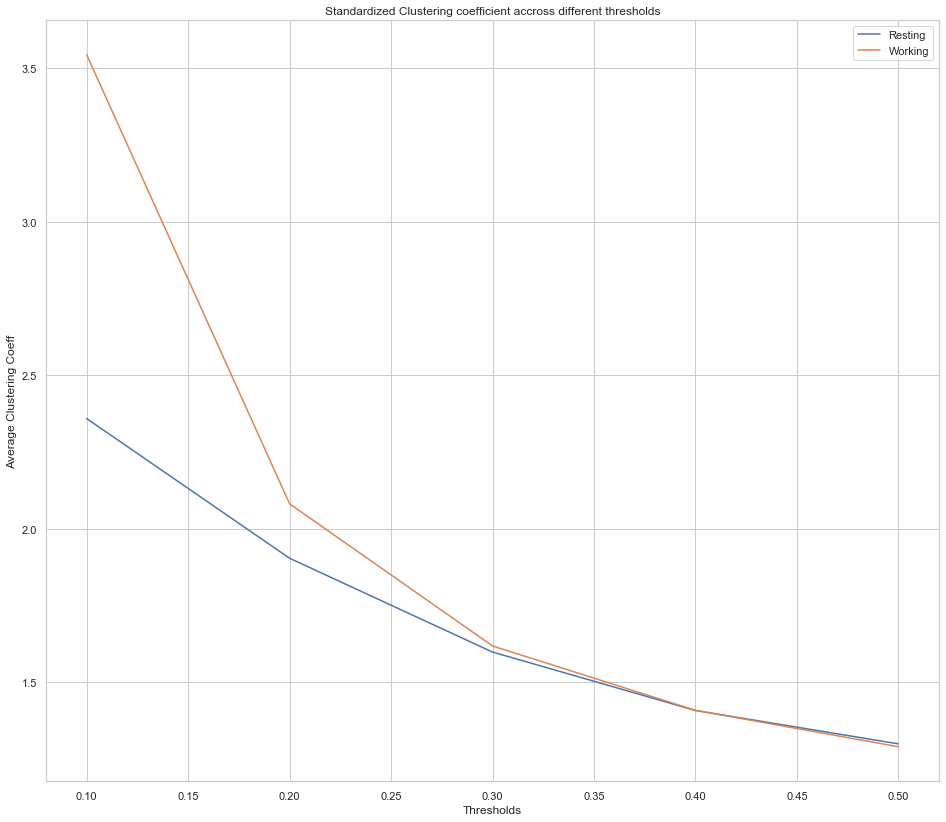

In [95]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=standardizedRestingClusters)
sns.lineplot(x=thresholds, y=standardizedWorkingClusters)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Average Clustering Coeff', 
       title='Standardized Clustering coefficient accross different thresholds');

# Global Efficiency

In [100]:
# global efficiencies for working state networks
efficiencies = [charpath(arr) for arr in workingStates]


# global efficiencies for resting state networks 
restingEfficiencies = [charpath(arr) for arr in restingStates]

In [101]:
normalizedEfficiencies = []
count = 10

for i in efficiencies:
    normalizedEfficiencies.append(normalized(i, random_efficiencies[count]))
    count += 10 

In [102]:
normalizedRestingEfficiencies = []
count = 10
for i in restingEfficiencies: 
    normalizedRestingEfficiencies.append(normalized(i, random_resting_efficiencies[count]))
    count += 10

In [107]:
random_resting_efficiencies

{10: 0.21708962046900715,
 20: 0.21942865066322428,
 30: 0.22013114109943568,
 40: 0.2199797903015698,
 50: 0.21998728136112966}

In [108]:
restingEfficiencies

[0.1826067002798918,
 0.18853258467125286,
 0.1895811680456769,
 0.18960507546627048,
 0.18960507546627048]

In [109]:
normalizedRestingEfficiencies

[0.8411581349922793,
 0.8591976667650834,
 0.8612192127784455,
 0.8619204300828786,
 0.8618910797620888]

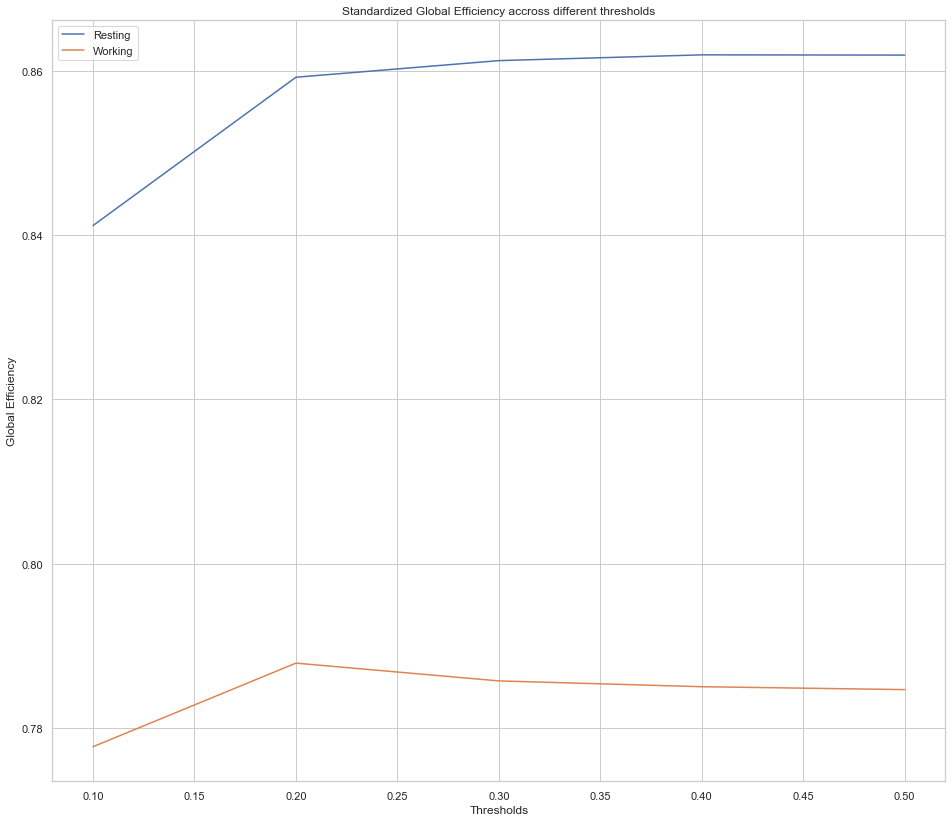

In [103]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=normalizedRestingEfficiencies)
sns.lineplot(x=thresholds, y=normalizedEfficiencies)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Global Efficiency', 
       title='Standardized Global Efficiency accross different thresholds');